# Course Description

Now that you have learned the foundations of pandas, this course will give
you the chance to apply that knowledge by answering interesting questions 
about a real dataset! You will explore the Stanford Open Policing Project 
dataset and analyze the impact of gender on police behavior. 
__During the course, you will gain more practice cleaning messy data, 
creating visualizations, combining and reshaping datasets, and manipulating
time series data.__ Analyzing Police Activity with pandas will give you 
valuable experience analyzing a dataset from start to finish, preparing you
for your data science career!

# Stanford Open Policing Project dataset

1) Locating missing values

2) Dropping a column

3) Dropping rows

4) Using proper data types

5) Creating a DatetimeIndex/ Setting the index

## Preparing the data for analysis

In [ ]:
"""

Before beginning your analysis, it is critical that you first examine and 
clean the dataset, to make working with it a more efficient process. 
In this chapter, you will practice fixing data types, handling missing 
values, and dropping columns and rows while learning about the Stanford 
Open Policing Project dataset.


"""

## Stanford Open Policing Project dataset

### Preparing the data

In [3]:
import pandas as pd
ri = pd.read_csv('./Data/police.csv')
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


### 1) Locating missing values

In [4]:
ri.isnull().head()

# Note: True = 1 , False = 0

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [5]:
ri.isnull().sum().head()

state                0
stop_date            0
stop_time            0
county_name      91741
driver_gender     5205
dtype: int64

### 2) Dropping a column

In [6]:
ri.shape

(91741, 15)

In [7]:
ri.drop('county_name', axis='columns', inplace=True)

### 3) Dropping rows

In [8]:
ri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [9]:
# .dropna() : Drop rows based on the presence of missing values

ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)

## 4) Using proper data types

In [10]:
ri.dtypes.head()

state            object
stop_date        object
stop_time        object
driver_gender    object
driver_race      object
dtype: object

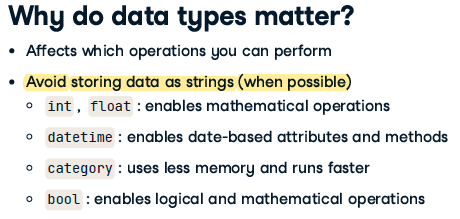

### Fixing a data type

In [11]:
apple =  pd.read_csv('./Data/aal.csv', index_col = 0)

apple.head()

,date,time,price
0,2/13/2018,16:00,164.34
1,2/14/2018,16:00,167.37
2,2/15/2018,16:00,172.99


In [12]:
apple.price.dtype

dtype('float64')

In [13]:
apple['price'] = apple.price.astype('float')

In [14]:
apple.price.dtype

dtype('float64')

## 5) Creating a DatetimeIndex

In [15]:
apple

,date,time,price
0,2/13/2018,16:00,164.34
1,2/14/2018,16:00,167.37
2,2/15/2018,16:00,172.99


In [16]:
apple.date.str.replace('/', '-')

0    2-13-2018
1    2-14-2018
2    2-15-2018
Name: date, dtype: object

### Combining "Date" with "Time"

In [17]:
combined = apple.date.str.cat(apple.time, sep=' ')

In [18]:
combined

0    2/13/2018 16:00
1    2/14/2018 16:00
2    2/15/2018 16:00
Name: date, dtype: object

### Converting to datetime format

In [19]:
apple['date_and_time'] = pd.to_datetime(combined)
apple

,date,time,price,date_and_time
0,2/13/2018,16:00,164.34,2018-02-13 16:00:00
1,2/14/2018,16:00,167.37,2018-02-14 16:00:00
2,2/15/2018,16:00,172.99,2018-02-15 16:00:00


In [20]:
apple.dtypes

date                     object
time                     object
price                   float64
date_and_time    datetime64[ns]
dtype: object

### Setting the index

In [21]:
apple.set_index('date_and_time', inplace=True)
apple

,date,time,price
date_and_time,,,
2018-02-13 16:00:00,2/13/2018,16:00,164.34
2018-02-14 16:00:00,2/14/2018,16:00,167.37
2018-02-15 16:00:00,2/15/2018,16:00,172.99


In [22]:
apple.index

DatetimeIndex(['2018-02-13 16:00:00', '2018-02-14 16:00:00',
               '2018-02-15 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)